# Instalando dependências

In [1]:
pip install yahooquery

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cmdstanpy==1.0.4

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from yahooquery import Ticker

# Obtendo dados

In [5]:
#symbols = ['fb', 'aapl', 'amzn', 'nflx', 'goog', 'TSLA']
started = '2021-01-01'
stock_market = 'T'
symbols = [stock_market]
history_raw = Ticker(symbols).history(start=started, end='2022-12-31',adj_ohlc=False)
history_raw

open       high        low      close    volume  \
symbol date                                                               
T      2021-01-04  22.197886  22.273415  21.918428  22.235649  86700816   
       2021-01-05  22.280968  22.469790  22.046827  22.099697  83054520   
       2021-01-06  22.212992  22.658609  22.182779  22.530210  73455520   
       2021-01-07  22.673716  22.726585  22.416918  22.590633  71265359   
       2021-01-08  22.009064  22.061934  21.714502  21.918428  72471656   
...                      ...        ...        ...        ...       ...   
       2022-12-23  18.170000  18.320000  18.100000  18.309999  25164100   
       2022-12-27  18.250000  18.520000  18.219999  18.459999  30382500   
       2022-12-28  18.450001  18.549999  18.190001  18.219999  26632300   
       2022-12-29  18.270000  18.549999  18.240000  18.450001  23765900   
       2022-12-30  18.420000  18.480000  18.219999  18.410000  26204200   

                    adjclose  dividends  splits  
symbol date                                      
T      2021-01-04  18.542572       0.00     0.0  
       2021-01-05  18.429197       0.00     0.0  
       2021-01-06  18.788210       0.00     0.0  
       2021-01-07  18.838598       0.00     0.0  
       2021-01-08  18.708683       0.52     0.0  
...                      ...        ...     ...  
       2022-12-23  18.049366       0.00     0.0  
       2022-12-27  18.197231       0.00     0.0  
       2022-12-28  17.960648       0.00     0.0  
       2022-12-29  18.187374       0.00     0.0  
       2022-12-30  18.147943       0.00     0.0  

[503 rows x 8 columns]

# Explorando os dados

In [6]:
history_corr = history_raw.copy().reset_index()
history_corr = history_corr[['open','high','low','close','volume']]

history_corr.describe()

,open,high,low,close,volume
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,19.879222,20.063595,19.705293,19.877075,5.438843e+07
std,2.031423,2.026323,2.031900,2.028703,2.792377e+07
min,14.490000,14.910000,14.460000,14.630000,1.378270e+07
25%,18.292748,18.477160,18.161102,18.317855,3.883359e+07
50%,19.770000,20.049999,19.500000,19.796074,4.757390e+07
75%,21.518127,21.635197,21.325529,21.499245,6.243342e+07
max,25.309668,25.589125,24.365559,24.645016,3.270974e+08


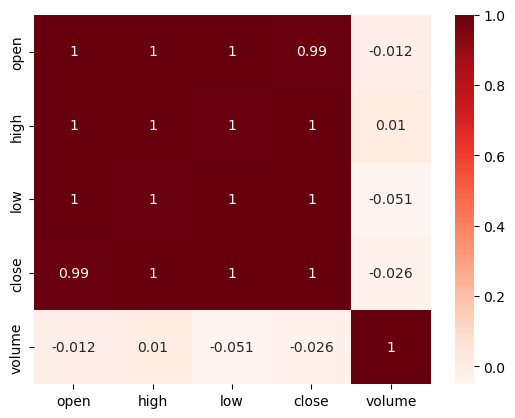

In [7]:
import seaborn as sns
from sklearn import preprocessing

cor = history_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

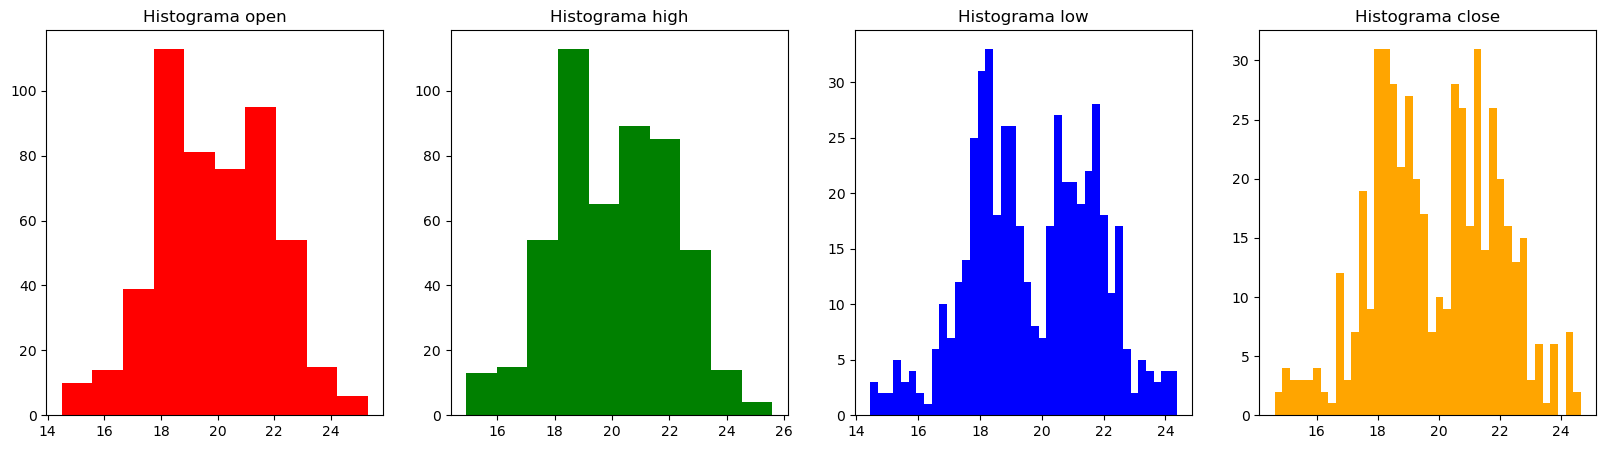

In [8]:
#new_fig = plt.figure(figsize=(18,8))
new_fig = plt.figure(figsize=(20,5))

#((5,4), (0,0))
ax1 = plt.subplot2grid((1,4), (0,0))
ax2 = plt.subplot2grid((1,4), (0,1))
ax3 = plt.subplot2grid((1,4), (0,2))
ax4 = plt.subplot2grid((1,4), (0,3))

ax1.hist(history_corr['open'], color='red',bins=10)
ax2.hist(history_corr['high'], color='green',bins=10)
ax3.hist(history_corr['low'], color='blue',bins=40);
ax4.hist(history_corr['close'], color='orange',bins=40)

ax1.set_title('Histograma open')
ax2.set_title('Histograma high')
ax3.set_title('Histograma low')
ax4.set_title('Histograma close')

plt.show()

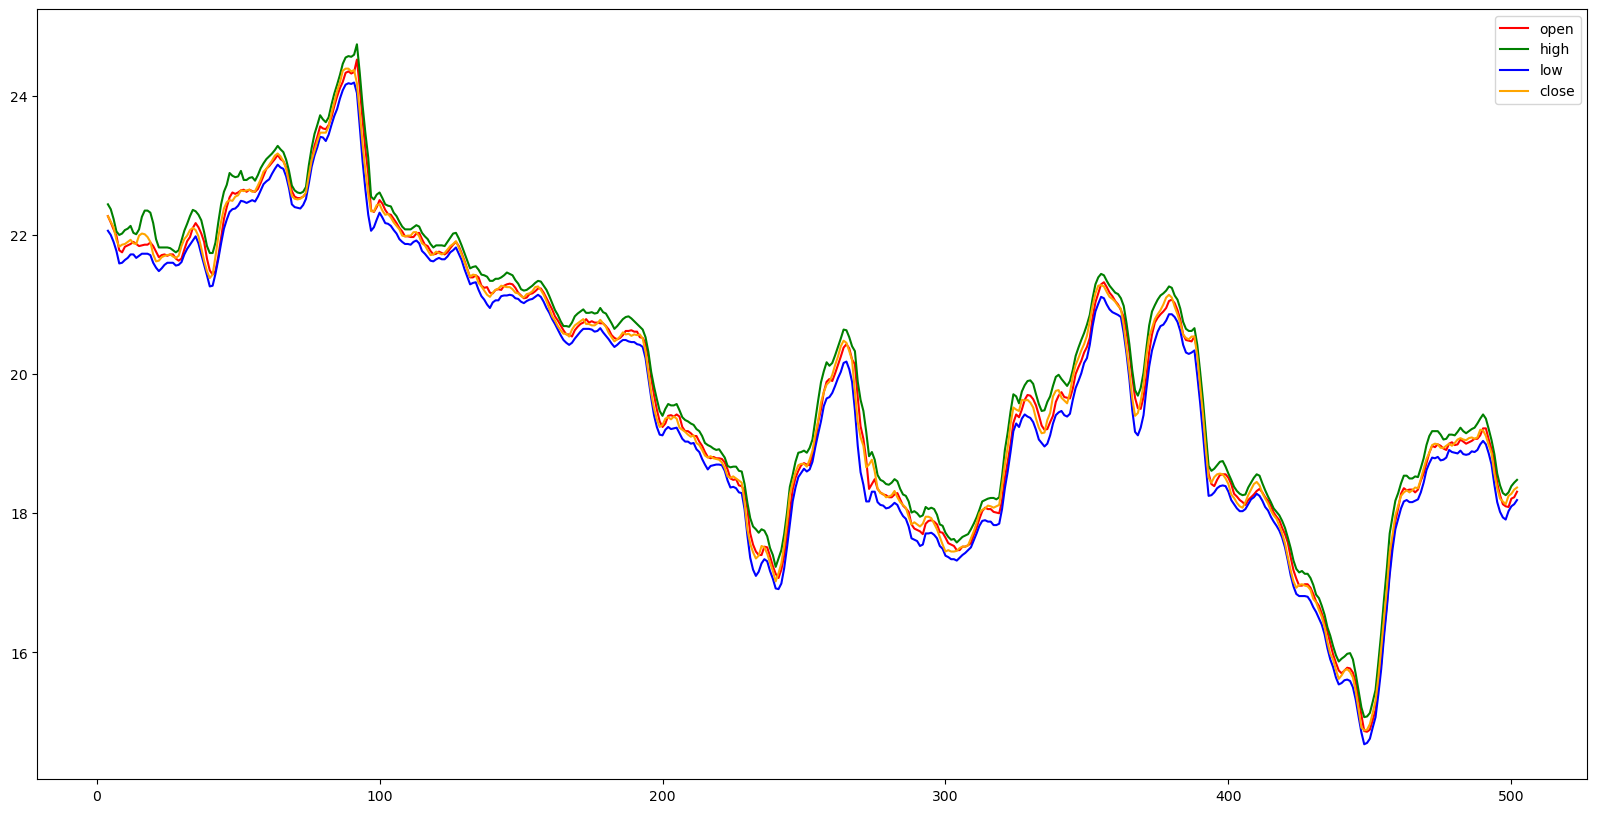

In [9]:
new_fig = plt.figure(figsize=(20,10))

plt.plot(history_corr['open'].rolling(5).mean().round(2), color='red', label = 'open')
plt.plot(history_corr['high'].rolling(5).mean().round(2), color='green', label = 'high')
plt.plot(history_corr['low'].rolling(5).mean().round(2), color='blue', label = 'low');
plt.plot(history_corr['close'].rolling(5).mean().round(2), color='orange', label = 'close')

plt.legend()
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_5816\2771238316.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  resultado.plot().show()


<Figure size 20000x11000 with 0 Axes>

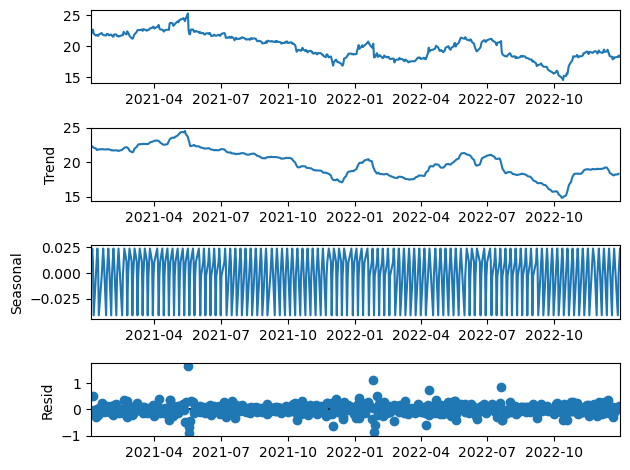

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

history_corr = history_raw.copy().reset_index()
history_corr = history_corr[['date','open']]
history_corr['date'] = pd.to_datetime(history_corr['date'])
history_corr.set_index('date',inplace=True)

resultado = seasonal_decompose(history_corr, period=5)
plt.figure(figsize=(200,110))
resultado.plot().show()

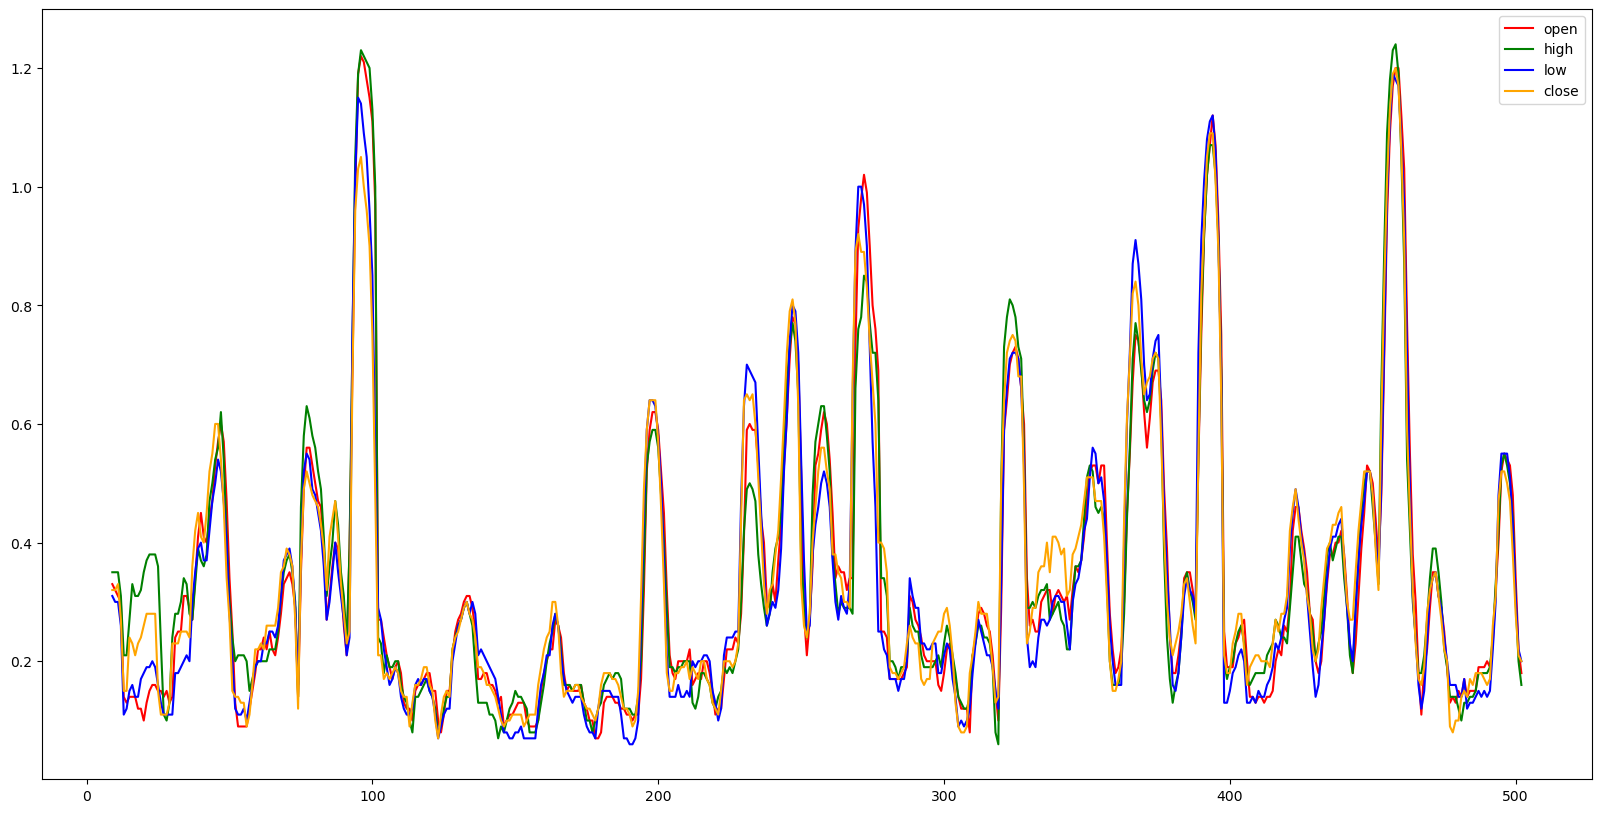

In [11]:
new_fig = plt.figure(figsize=(20,10))

history_corr = history_raw.copy().reset_index()
plt.plot(history_corr['open'].rolling(10).std().round(2), color='red', label = 'open')
plt.plot(history_corr['high'].rolling(10).std().round(2), color='green', label = 'high')
plt.plot(history_corr['low'].rolling(10).std().round(2), color='blue', label = 'low');
plt.plot(history_corr['close'].rolling(10).std().round(2), color='orange', label = 'close')

plt.legend()
plt.show()

# Preparando o conjunto de dados

In [12]:
history = history_raw.copy()

def rolling_column_std( df, column_name, days,exclude=True ):
    column_name_hist = "std_%s_%sd" % (column_name, days)
    df[column_name_hist] = df[column_name].rolling(days).std().round(2)
    if exclude:
        df.drop([column_name], axis='columns', inplace=True)

rolling_column_std(history,'open', 5, False)
rolling_column_std(history,'close', 5, False)
rolling_column_std(history,'volume', 5, False)
rolling_column_std(history,'high', 5, False)
rolling_column_std(history,'low', 5, False)

rolling_column_std(history,'open', 10, False)
rolling_column_std(history,'close', 10)
rolling_column_std(history,'volume', 10)
rolling_column_std(history,'high', 10, False)
rolling_column_std(history,'low', 10)

history.dropna(subset=['std_open_5d'], inplace=True)
history.dropna(subset=['std_open_10d'], inplace=True)
history.drop(['dividends','adjclose','splits'], axis='columns', inplace=True, errors='ignore')

history

open       high  std_open_5d  std_close_5d  \
symbol date                                                          
T      2021-01-15  21.865559  22.122356         0.09          0.22   
       2021-01-19  22.114803  22.190332         0.18          0.21   
       2021-01-20  21.903322  21.910875         0.18          0.20   
       2021-01-21  21.835346  21.963745         0.17          0.14   
       2021-01-22  21.759819  21.941088         0.13          0.09   
...                      ...        ...          ...           ...   
       2022-12-23  18.170000  18.320000         0.17          0.18   
       2022-12-27  18.250000  18.520000         0.16          0.15   
       2022-12-28  18.450001  18.549999         0.16          0.12   
       2022-12-29  18.270000  18.549999         0.16          0.11   
       2022-12-30  18.420000  18.480000         0.12          0.10   

                   std_volume_5d  std_high_5d  std_low_5d  std_open_10d  \
symbol date                                                               
T      2021-01-15    16280876.54         0.30        0.11          0.33   
       2021-01-19    13759011.93         0.30        0.15          0.32   
       2021-01-20    15832559.73         0.28        0.14          0.31   
       2021-01-21    18279941.92         0.23        0.10          0.30   
       2021-01-22     7233496.40         0.12        0.09          0.14   
...                          ...          ...         ...           ...   
       2022-12-23    13895647.17         0.10        0.19          0.53   
       2022-12-27     7241690.72         0.15        0.15          0.48   
       2022-12-28     6769230.78         0.14        0.12          0.34   
       2022-12-29     3687825.61         0.13        0.13          0.22   
       2022-12-30     2470531.25         0.10        0.06          0.18   

                   std_close_10d  std_volume_10d  std_high_10d  std_low_10d  
symbol date                                                                  
T      2021-01-15           0.32     15752283.19          0.35         0.31  
       2021-01-19           0.32     14684785.23          0.35         0.30  
       2021-01-20           0.33     14429626.37          0.35         0.30  
       2021-01-21           0.27     15283078.31          0.31         0.26  
       2021-01-22           0.15     14666731.35          0.21         0.11  
...                          ...             ...           ...          ...  
       2022-12-23           0.47     15370231.69          0.50         0.51  
       2022-12-27           0.38     15471215.09          0.44         0.43  
       2022-12-28           0.28     16201772.04          0.30         0.31  
       2022-12-29           0.21     17262933.65          0.20         0.22  
       2022-12-30           0.20     17661984.86          0.16         0.20  

[494 rows x 12 columns]

In [13]:
from prophet import Prophet

history_goog = history.reset_index()
#history['date'] = pd.to_datetime(history['date'])
#history.sort_values(by=['symbol','date'], inplace = True)
history_goog = history_goog[ history_goog['symbol'] == stock_market ]

history_goog.rename({"date": "ds"}, inplace=True, axis=1)
history_goog.rename({"open": "y"}, inplace=True, axis=1)

print('completed')

completed


In [14]:
history_raw_goog = Ticker(symbols).history(start=started, end='2023-01-20',adj_ohlc=False)
history_raw_goog = history_raw_goog.reset_index()
print('completed')

completed


In [15]:
history_raw_goog_cp = history_raw_goog.copy()

history_raw_goog_cp['date'] = pd.to_datetime(history_raw_goog_cp['date'])
history_raw_goog_cp.sort_values(by=['date'], inplace = True)

rolling_column_std(history_raw_goog_cp,'open', 5, False)
rolling_column_std(history_raw_goog_cp,'close', 5, False)
rolling_column_std(history_raw_goog_cp,'volume', 5, False)
rolling_column_std(history_raw_goog_cp,'high', 5, False)
rolling_column_std(history_raw_goog_cp,'low', 5, False)

rolling_column_std(history_raw_goog_cp,'open', 10, False)
rolling_column_std(history_raw_goog_cp,'close', 10)
rolling_column_std(history_raw_goog_cp,'volume', 10)
rolling_column_std(history_raw_goog_cp,'high', 10, False)
rolling_column_std(history_raw_goog_cp,'low', 10)

history_raw_goog_cp.dropna(subset=['std_open_5d','std_open_10d'], inplace=True)
#history_raw_goog_cp.drop(['adjclose'], axis='columns', inplace=True)
print('completed')

completed


In [16]:
history_raw_goog_cp.sample(5)

,symbol,date,open,high,adjclose,dividends,splits,std_open_5d,std_close_5d,std_volume_5d,std_high_5d,std_low_5d,std_open_10d,std_close_10d,std_volume_10d,std_high_10d,std_low_10d
217,T,2021-11-11,18.874622,18.957705,17.267096,0.0,0.0,0.11,0.11,9195365.11,0.12,0.09,0.20,0.17,12717260.32,0.17,0.21
270,T,2022-01-28,18.179758,19.063444,17.941116,0.0,0.0,1.01,0.84,35967218.01,0.79,0.80,0.93,0.92,37802721.96,0.76,1.00
72,T,2021-04-19,22.658609,22.719032,19.774181,0.0,0.0,0.11,0.12,7461907.33,0.09,0.17,0.33,0.36,10169705.70,0.35,0.36
407,T,2022-08-16,18.370001,18.700001,17.986208,0.0,0.0,0.12,0.24,9789985.69,0.21,0.16,0.14,0.19,7616689.60,0.16,0.13
64,T,2021-04-07,23.421450,23.527189,19.940025,0.0,0.0,0.21,0.23,6937851.39,0.20,0.25,0.25,0.26,11972183.30,0.22,0.25


# Treinando o algoritmo

In [17]:
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

history_raw_goog_cp.rename({"date": "ds"}, inplace=True, axis=1)
history_raw_goog_cp.rename({"open": "y"}, inplace=True, axis=1)
history_goog.rename({"high": "cap"}, inplace=True, axis=1)

param_grid = {
    'growth': ['linear', 'logistic', 'flat'],
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.1, 1.0, 5.0],
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
results = []

import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

result = {}
result['rmse'] = [100]
win_m = None
win_params = None

for params in all_params:
    m = Prophet(**params)
    m.add_regressor('std_open_5d')
    m.add_regressor('std_close_5d')
    m.add_regressor('std_volume_5d')
    m.add_regressor('std_high_5d')
    m.add_regressor('std_low_5d')

    m.add_regressor('std_open_10d')
    m.add_regressor('std_close_10d')
    m.add_regressor('std_volume_10d')
    m.add_regressor('std_high_10d')
    m.add_regressor('std_low_10d')
    
    m.fit(history_goog)    
    df_cv = cross_validation(m, horizon = '60 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    
    if df_p['rmse'][0] < result['rmse'][0]:
        result = df_p
        win_m = m
        win_params = params
        print(df_p)

print('completed')

Optimization terminated abnormally. Falling back to Newton.


  0%|          | 0/16 [00:00<?, ?it/s]

  horizon      mse      rmse       mae      mape     mdape     smape  coverage
0 60 days  3.75028  1.936564  1.513255  0.082482  0.067319  0.081461       0.4


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.


  0%|          | 0/16 [00:00<?, ?it/s]

  horizon       mse      rmse       mae      mape     mdape     smape  \
0 60 days  0.027159  0.164801  0.124106  0.006684  0.005031  0.006671   

   coverage  
0       0.8  


  0%|          | 0/16 [00:00<?, ?it/s]

  horizon       mse      rmse       mae      mape    mdape     smape  coverage
0 60 days  0.026453  0.162645  0.120866  0.006519  0.00496  0.006501  0.798496


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.


  horizon       mse      rmse       mae      mape     mdape     smape  \
0 60 days  0.025127  0.158516  0.119647  0.006459  0.005024  0.006446   

   coverage  
0  0.807519  


  0%|          | 0/16 [00:00<?, ?it/s]

  horizon       mse      rmse       mae      mape     mdape     smape  \
0 60 days  0.024908  0.157824  0.119134  0.006431  0.004989  0.006419   

   coverage  
0  0.810526  


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  horizon       mse      rmse       mae      mape     mdape     smape  \
0 60 days  0.024842  0.157612  0.120348  0.006497  0.005085  0.006488   

   coverage  
0  0.810526  


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

completed


Text(91.97222222222221, 0.5, 'Preço abertura')

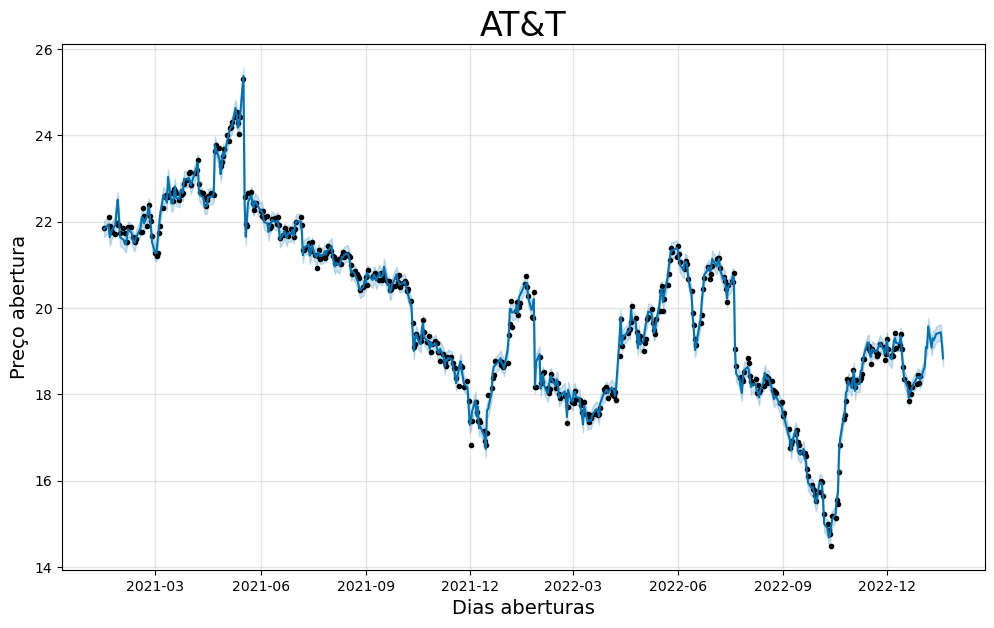

In [18]:
history_raw_goog_cp.rename({"high": "cap"}, inplace=True, axis=1)
forecast = win_m.predict(history_raw_goog_cp)

forecast1 = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper']]
fig1 = win_m.plot(forecast1, uncertainty=True)

ax = fig1.gca()
#fig1.set_figwidth(40)
#fig1.set_figheight(10)
ax.set_title("AT&T", size=24)
ax.set_xlabel("Dias aberturas", size=14)
ax.set_ylabel("Preço abertura", size=14)

# Analisando resultados

In [19]:
result

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,60 days,0.024842,0.157612,0.120348,0.006497,0.005085,0.006488,0.810526


In [20]:
win_params

{'growth': 'logistic',
 'changepoint_prior_scale': 0.5,
 'seasonality_prior_scale': 0.1}

In [21]:
forecast1

,ds,trend,yhat,yhat_lower,yhat_upper
0,2021-01-15,22.098050,21.826112,21.648137,22.016720
1,2021-01-19,22.166312,21.939123,21.756030,22.130906
2,2021-01-20,21.887246,21.641540,21.447031,21.826982
3,2021-01-21,21.940147,21.709312,21.511451,21.892709
4,2021-01-22,21.917602,21.807437,21.627303,22.002663
...,...,...,...,...,...
501,2023-01-12,19.568575,19.326681,19.140333,19.506421
502,2023-01-13,19.588579,19.400772,19.211266,19.579245
503,2023-01-17,19.568601,19.436924,19.248960,19.625600
504,2023-01-18,19.328624,19.162973,18.976955,19.342174


In [22]:
#symbols = ['fb', 'aapl', 'amzn', 'nflx', 'goog', 'TSLA']
stock_market = 'T'
symbols = [stock_market]
history_raw_1 = Ticker(symbols).history(start='2023-01-01', end='2023-03-15',adj_ohlc=False)

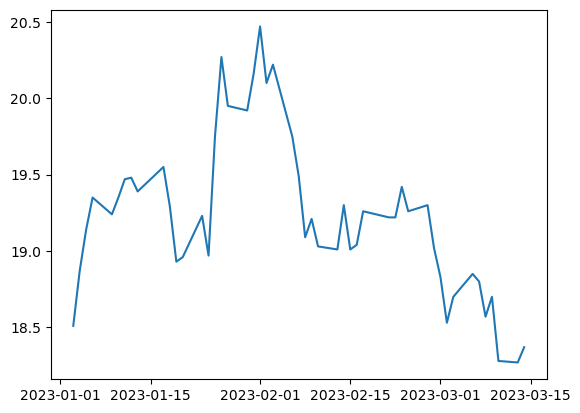

In [23]:
history_raw_1 = history_raw_1.reset_index()

plt.plot(history_raw_1[['date']],history_raw_1[['open']])